# Analiza letalskih nesreč

Pripravimo podatke za analizo.

In [90]:
import pandas as pd
from heapq import nlargest
from operator import itemgetter
%matplotlib inline

In [91]:
pd.options.display.max_rows = 10

In [92]:
letalske_nesrece = pd.read_csv('C:\Analiza-letalskih-nesrec\plane_crashes.csv')

letalske_nesrece_brez_opisa = pd.read_csv('nesrece_brez_opisa.csv').drop('summary', 1)

letalske_nesrece_brez_leta = pd.read_csv('nesrece_brez_leta.csv')

Združimo tabele.

In [93]:
nesrece = pd.merge(letalske_nesrece_brez_opisa, letalske_nesrece, how='left', on=['passengers', 'crew', 'fatalities', 'survivors'])

nesrece = pd.merge(letalske_nesrece_brez_leta, nesrece, how='left', on=['passengers', 'crew', 'fatalities', 'survivors'])

In [94]:
nesrece = nesrece.drop(['title_x', 'year_x', 'operator_x'], 1)

In [95]:
nesrece

,operator,passengers,crew,fatalities,survivors,title_y,year_y,summary,operator_y
0,Caproni,12,2,14,0,1919 Verona Caproni Ca.48 crash,1919.0,Possible structural failure,Caproni
1,Caproni,12,2,14,0,1919 Verona Caproni Ca.48 crash,1919.0,Possible structural failure,Caproni
2,Handley Page Transport,6,2,4,4,1920 Golders Green Handley Page O/400 crash,1920.0,NaN,Handley Page Transport
3,Daimler Hire Limited (page does not exist),3,2,5,0,1923 Daimler Airway de Havilland DH.34 crash,1923.0,"Pilot error, stall",Daimler Airway
4,Daimler Hire Limited (page does not exist),3,2,5,0,1923 Daimler Airway de Havilland DH.34 crash,1923.0,"Pilot error, stall",Daimler Airway
...,...,...,...,...,...,...,...,...,...
916,Air France,497,24,0,521,Air France Flight 66,2017.0,NaN,Air France
917,Air France,497,24,0,521,Air France Flight 66,2017.0,NaN,Air France
918,Air France,497,24,0,521,Air France Flight 66,2017.0,NaN,Air France
919,Air France,497,24,0,521,Air France Flight 66,2017.0,NaN,Air France


In [96]:
nesrece = nesrece.rename(columns = {'title_y':'ime', 'year_y':'leto', 'operator_y':'letalska_druzba', 'passengers':'potniki', 'crew':'posadka', 'fatalities':'zrtve', 'survivors':'preziveli', 'summary':'vzrok'}).drop(['operator'], 1)

In [97]:
nesrece = nesrece[['ime', 'leto', 'letalska_druzba', 'vzrok', 'potniki', 'posadka', 'zrtve', 'preziveli']]

In [98]:
nesrece

,ime,leto,letalska_druzba,vzrok,potniki,posadka,zrtve,preziveli
0,1919 Verona Caproni Ca.48 crash,1919.0,Caproni,Possible structural failure,12,2,14,0
1,1919 Verona Caproni Ca.48 crash,1919.0,Caproni,Possible structural failure,12,2,14,0
2,1920 Golders Green Handley Page O/400 crash,1920.0,Handley Page Transport,NaN,6,2,4,4
3,1923 Daimler Airway de Havilland DH.34 crash,1923.0,Daimler Airway,"Pilot error, stall",3,2,5,0
4,1923 Daimler Airway de Havilland DH.34 crash,1923.0,Daimler Airway,"Pilot error, stall",3,2,5,0
...,...,...,...,...,...,...,...,...
916,Air France Flight 66,2017.0,Air France,NaN,497,24,0,521
917,Air France Flight 66,2017.0,Air France,NaN,497,24,0,521
918,Air France Flight 66,2017.0,Air France,NaN,497,24,0,521
919,Air France Flight 66,2017.0,Air France,NaN,497,24,0,521


Razporedimo nesreče naraščajoče po letu.

In [99]:
nesrece.sort_values('leto')

,ime,leto,letalska_druzba,vzrok,potniki,posadka,zrtve,preziveli
0,1919 Verona Caproni Ca.48 crash,1919.0,Caproni,Possible structural failure,12,2,14,0
606,1919 Verona Caproni Ca.48 crash,1919.0,Caproni,Possible structural failure,12,2,14,0
607,1919 Verona Caproni Ca.48 crash,1919.0,Caproni,Possible structural failure,12,2,14,0
733,1919 Verona Caproni Ca.48 crash,1919.0,Caproni,Possible structural failure,12,2,14,0
811,1919 Verona Caproni Ca.48 crash,1919.0,Caproni,Possible structural failure,12,2,14,0
...,...,...,...,...,...,...,...,...
877,NaN,NaN,NaN,NaN,74,8,0,82
880,NaN,NaN,NaN,NaN,104,8,0,112
898,NaN,NaN,NaN,NaN,49,7,0,56
908,NaN,NaN,NaN,NaN,0,6,5,1


## Komentar

Podatke za vsako letalsko nesrečo sem pridobila iz različnih strani na Wikipediji, ker so bili ti podani na različne načine, je bilo težko napisati regularne izraze, ki bi delovali na vsaki strani. Mnogo podatkov se je izgubilo, zato sem problematične pobirala posebej in jih nadknadno dodala v tabelo, da bi te izgube čim manj vplivale na analizo.

## Analiza podatkov

Pri analizi me bo zanimalo, koliko je bilo letalskih nesreč, se števila le-teh večajo z leti, 
katera je letalska družba z največimi nesrečami in kateri so najpogostejši vzroki nesreče.

Pri analizi po letih se bo veliko podatkov izgubilo, saj nisem uspela iz vseh letalskih nesreč pridobiti tega prodatka.

Od leta 1919 sem našla 921 letalskih nesreč.
Poglejmo, kolikšno je celotno število žrtev v teh letalskih nesrečah. 

In [100]:
st_mrtvih = sum(nesrece['zrtve'])
st_potnikov = sum(nesrece['potniki']) + sum(nesrece['posadka'])
st_prezivelih = sum(nesrece['preziveli'])

In [101]:
st_mrtvih, st_prezivelih

(41423, 34581)

Po teh številih vidimo, da je število mrtvih v letalskih nesrečah večje kot število preživelih. 
Po tem predvidevamo, da je več letalskih nesreč, kjer preživi manj kot pol udeleženih. Z izračunom preverimo hipotezo.

In [102]:
nesrece[(nesrece.zrtve)/(nesrece.potniki + nesrece.posadka) >= 0.5]

,ime,leto,letalska_druzba,vzrok,potniki,posadka,zrtve,preziveli
0,1919 Verona Caproni Ca.48 crash,1919.0,Caproni,Possible structural failure,12,2,14,0
1,1919 Verona Caproni Ca.48 crash,1919.0,Caproni,Possible structural failure,12,2,14,0
2,1920 Golders Green Handley Page O/400 crash,1920.0,Handley Page Transport,NaN,6,2,4,4
3,1923 Daimler Airway de Havilland DH.34 crash,1923.0,Daimler Airway,"Pilot error, stall",3,2,5,0
4,1923 Daimler Airway de Havilland DH.34 crash,1923.0,Daimler Airway,"Pilot error, stall",3,2,5,0
...,...,...,...,...,...,...,...,...
899,2016 Sunbird Aviation crash,2016.0,Aircraft registration,Improper loading which led to a stall,11,1,12,0
900,EgyptAir Flight 804,2016.0,EgyptAir,"Crashed, in-flight fire, under investigation",56,10,66,0
906,LaMia Flight 2933,2016.0,LaMia,NaN,73,4,71,6
907,Pakistan International Airlines Flight 661,2016.0,Pakistan International Airlines,"Engine failure issues, investigation ongoing",42,5,47,0


Nesreč, kjer je preživelo manj kot pol udeležencev, je 672, kar je večina letalskih nesreč. 

Poglejmo povprečno število mrtvih v letalskih nesrečah na leto in če to število narašča z leti.

In [103]:
nesrece_po_letih = nesrece.groupby('leto')
#povprečno število žrtev vsako leto
st_zrtev_na_leto = nesrece_po_letih['zrtve'].mean()
#število nesreč na leto
st_nesrec_na_leto = nesrece_po_letih.size()

In [104]:
max(nesrece['zrtve'])

520

Največje število mrtivih v eni letalski nesreči je bilo 520.

In [105]:
st_nesrec_na_leto

leto
1919.0     8
1920.0     1
1923.0    11
1933.0     1
1934.0     3
          ..
2013.0     2
2014.0     3
2015.0    19
2016.0    20
2017.0    11
Length: 70, dtype: int64

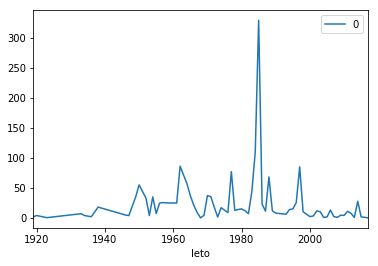

In [106]:
pd.DataFrame(st_zrtev_na_leto/st_nesrec_na_leto).plot()

Graf prikazuje povprečno število mrtvih na eno letalsko nesrečo v odvisnosti od leta. Graf močno odstopa okoli leta 1985.
Poglejmo še število letalskih nesreč na leto.

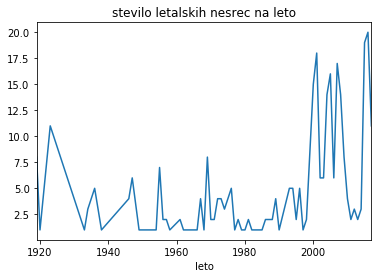

In [107]:
st_nesrec_na_leto.plot(title = 'stevilo letalskih nesrec na leto')

Iz tega grafa lahko vidimo, da število letalskih nesreč na leto narašča, kar je lepše razvidno iz grafa, razdeljenega na petletke. To ne pomeni, da so letala postala bolj nezanesljivo prevozno sredstvo, saj se tudi število letov na leto verjetno veča, ampak mi tega podatka ni uspelo najti.

In [108]:
nesrece['petletka'] = 5 * (nesrece.leto // 5)

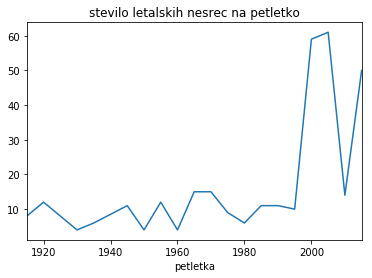

In [109]:
nesrece.groupby('petletka').size().plot(title = 'stevilo letalskih nesrec na petletko')

Izrazito odstopa število letalskih nesreč v letih 2000-2005, do takrat pa je število približno enako.

### Letalske družbe

Poglejmo, katere letalske družbe imajo največ nesreč.

In [110]:
st_nesrec_glede_na_druzbo = nesrece.groupby('letalska_druzba')

[Text(0,0.5,'stevilo_nesrec'), Text(0.5,0,'letalska_druzba')]

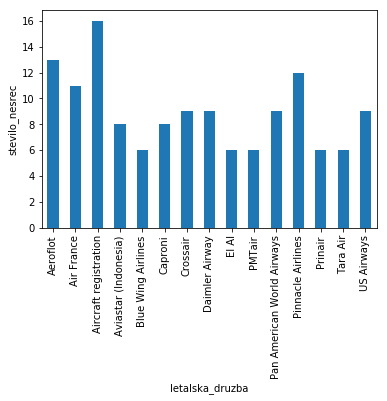

In [111]:
st_nesrec_glede_na_druzbo.count()[st_nesrec_glede_na_druzbo.count().leto>5]['leto'].plot(kind='bar').set(xlabel = 'letalska_druzba', ylabel='stevilo_nesrec')

Na grafu je razvidno, katere letalske družbe so imele največje število nesreč, med njimi so Aerflot, ki je ruska, Air France, francoska, Pinnacle Airlines, ameriška, Aircraft registration pa je ime za skupino večih letalskih prevoznikov.

### Vzroki nesreč

Poglejmo si najpogostejše vzroke letalskih nesreč. Potrebovali bomo korene besed iz opisa nesreče.

In [112]:
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if not beseda:
        return '$'
    konec = len(beseda) - 1
    if beseda[konec] in 'ds':
        konec -= 1
    while konec >= 0 and beseda[konec] in 'aeiou':
        konec -= 1
    return beseda[:konec + 1]

def koreni_besed(niz):
    return pd.Series(list({
        koren_besede(beseda) for beseda in niz.replace('-', ' ').lower().split() if beseda
    }))

def koreni_opisa(nizi):
    return nizi[nizi.notnull()].apply(
        koreni_besed
    ).stack().reset_index(level=1, drop=True)


Preštejmo ponovitve korenov besed v opisih.

In [113]:
koreni = pd.DataFrame(koreni_opisa(nesrece.vzrok))

In [114]:
koreni['vzroki'] = koreni

In [115]:
def pojavitev_besed():
    besede = {}
    for beseda in list(koreni.vzroki):
        if beseda in besede:
            besede[beseda] += 1
        else:
            besede[beseda] = 1
    return besede

ponovitve_besed = pojavitev_besed()

In [116]:
ponovitve_besed

{'': 4,
 '$': 7,
 'accidental': 1,
 'activation': 1,
 'after': 11,
 'aggravat': 1,
 'air': 1,
 'aircraft': 7,
 'airliner': 1,
 'amp': 1,
 'an': 20,
 'approach': 5,
 'aroun': 1,
 'atc': 1,
 'attack': 1,
 'attempt': 4,
 'aviation': 1,
 'awarenes': 1,
 'b': 1,
 'bir': 1,
 'blad': 1,
 'boar': 1,
 'bomb': 1,
 'bombing': 4,
 'break': 4,
 'by': 10,
 'car': 1,
 'carg': 1,
 'catastrophic': 2,
 'caus': 10,
 'causing': 1,
 'cfit': 6,
 'climb': 1,
 'clipp': 1,
 'clos': 1,
 'collaps': 3,
 'collision': 3,
 'company': 1,
 'condition': 3,
 'contamination': 4,
 'control': 16,
 'controll': 1,
 'controller': 6,
 'cowl': 2,
 'crash': 12,
 'crew': 4,
 'crocodil': 1,
 'd': 18,
 'damag': 1,
 'danger': 1,
 'decompression': 2,
 'deliberat': 1,
 'detonat': 1,
 'disappearanc': 1,
 'disput': 4,
 'ditching': 1,
 'down': 6,
 'drag': 2,
 'during': 9,
 'emergency': 2,
 'engin': 29,
 'error': 44,
 'escap': 1,
 'exces': 1,
 'excessiv': 2,
 'excursion': 1,
 'explosion': 2,
 'explosiv': 2,
 'fail': 1,
 'failur': 44,
 'fa

In [117]:
from heapq import nlargest
from operator import itemgetter

for beseda, stevilo in nlargest(40, ponovitve_besed.items(), key=itemgetter(1)):
    print (beseda, stevilo)

failur 44
error 44
pilot 34
t 31
engin 29
of 25
los 22
in 20
an 20
investigation 19
d 18
under 18
stall 17
structural 16
control 16
runway 16
flight 15
possibl 13
fir 13
crash 12
flameout 12
after 11
takeoff 11
landing 10
by 10
caus 10
undetermin 9
leading 9
during 9
overrun 8
wing 7
following 7
aircraft 7
$ 7
on 6
separation 6
weather 6
inconclusiv 6
mechanical 6
shot 6


Iz podatkov vidimo, da je najpogostejši vzrok prenehanje delovanja nekje na letalu, za tem so kakršne koli napake, problemi pri pristajanju. Tudi trčenje in požar sta med najpogostejšimi. Za mnogo nesreč še niso odkrili vzroka.

In [118]:
ponovitve_besed[koren_besede('bomb')]+ponovitve_besed[koren_besede('suicide')]+ponovitve_besed[koren_besede('terrorist')]

5

Po izračunu vidimo, da teroristični napad ni pogost vzrok letalskih nesreč, saj je bilo takih primerov le 5.
Poglejmo, če enako velja za vremenske razmere.

In [119]:
ponovitve_besed[koren_besede('weather')]+ponovitve_besed[koren_besede('lightning')]

8

Takih je bilo 8, verjetno jih je blio veliko več, vendar pri vsaki letalski nesreči zraven ni bilo podanega vzroka.